In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [25]:
df = pd.read_csv("C:/Users/CPFNBZ/Downloads/phishing.csv", delimiter=',', header=None)

In [26]:
print(df.head())

   0   1   2   3   4   5   6   7   8   9   ...  21  22  23  24  25  26  27  \
0  -1   1   1   1  -1  -1  -1  -1  -1   1  ...   1   1  -1  -1  -1  -1   1   
1   1   1   1   1   1  -1   0   1  -1   1  ...   1   1  -1  -1   0  -1   1   
2   1   0   1   1   1  -1  -1  -1  -1   1  ...   1   1   1  -1   1  -1   1   
3   1   0   1   1   1  -1  -1  -1   1   1  ...   1   1  -1  -1   1  -1   1   
4   1   0  -1   1   1  -1   1   1  -1   1  ...  -1   1  -1  -1   0  -1   1   

   28  29  30  
0   1  -1  -1  
1   1   1  -1  
2   0  -1  -1  
3  -1   1  -1  
4   1   1   1  

[5 rows x 31 columns]


In [47]:
# Load the dataset with column headers
header_list = ['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
               'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
               'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
               'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
               'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
               'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
               'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
               'LinksPointingToPage', 'StatsReport', 'Class']

# Load the dataset with headers
df = pd.read_csv("C:/Users/CPFNBZ/Downloads/phishing.csv", header=None, names=header_list)
print(df.head())

   UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0       -1        1         1        1             -1             -1   
1        1        1         1        1              1             -1   
2        1        0         1        1              1             -1   
3        1        0         1        1              1             -1   
4        1        0        -1        1              1             -1   

   SubDomains  HTTPS  DomainRegLen  Favicon  ...  UsingPopupWindow  \
0          -1     -1            -1        1  ...                 1   
1           0      1            -1        1  ...                 1   
2          -1     -1            -1        1  ...                 1   
3          -1     -1             1        1  ...                 1   
4           1      1            -1        1  ...                -1   

   IframeRedirection  AgeofDomain  DNSRecording  WebsiteTraffic  PageRank  \
0                  1           -1            -1              -1      

In [48]:
# Assuming the last column is the target label and others are features
#X = df.iloc[:, :-1]
#y = df.iloc[:, -1]

#Set the features and target
features = [5, 13]  # Indices of "PrefixSuffix-" and "AnchorURL"
X = df.iloc[:, features]
y = df.iloc[:, -1]

In [50]:
# Set the features and target
features = ['PrefixSuffix-', 'AnchorURL']
X = df[features]
y = df['Class']

In [51]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Build the Logistic Regression model
C = 100  # C parameter for regularization
logreg = LogisticRegression(C=C)
logreg.fit(X_train, y_train)

C:\Program Files\AppV_Packages\F4CE3137-B142-460D-B02F-83EC49C665B1\CF236728-255E-45D7-9298-E8ACF58348C7\Root\VFS\ProgramFilesX64\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
#Predict on test data
y_pred = logreg.predict(X_test) 

In [40]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
misclassified_count = (y_test != y_pred).sum()

In [52]:
# Print results
print(f"Count of misclassified samples: {misclassified_count}")
print(f"Accuracy score: {accuracy:.2f}")

Count of misclassified samples: 482
Accuracy score: 0.85


In [53]:
# Plot decision boundary
def plot_decision_boundary(X, y, model, feature_names):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("Decision Boundary")
    plt.show()


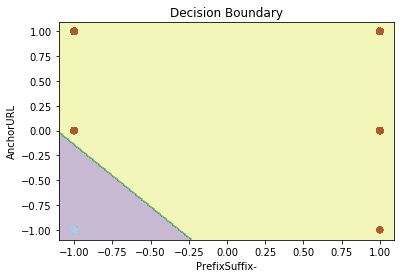

In [43]:
# Plot decision boundary for "PrefixSuffix-" and "AnchorURL" features
feature_names = df.columns[features]
plot_decision_boundary(X_test.values, y_test.values, logreg, features)